# Business DataSet 확인

In [10]:
import pandas as pd

file_path = "yelp_dataset\csv\yelp_academic_dataset_business.csv"
df = pd.read_csv(file_path)
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,"1616 Chapala St, Ste 2",{u'ByAppointmentOnly': u'True'},Pns2l4eNsfO8kk83dixA6A,"Doctors, Traditional Chinese Medicine, Naturop...",Santa Barbara,NaN,0,34.426679,-119.711197,"Abby Rappoport, LAC, CMQ",93101,7,5.0,CA
1,87 Grasso Plaza Shopping Center,{u'BusinessAcceptsCreditCards': u'True'},mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",Affton,"{u'Monday': u'0:0-0:0', u'Tuesday': u'8:0-18:3...",1,38.551126,-90.335695,The UPS Store,63123,15,3.0,MO
2,5255 E Broadway Blvd,"{u'DogsAllowed': u'False', u'BusinessParking':...",tUFrWirKiKi_TAnsVWINQQ,"Department Stores, Shopping, Fashion, Home & G...",Tucson,"{u'Monday': u'8:0-22:0', u'Tuesday': u'8:0-22:...",0,32.223236,-110.880452,Target,85711,22,3.5,AZ
3,935 Race St,"{u'BusinessParking': u'{'garage': False, 'stre...",MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Philadelphia,"{u'Monday': u'7:0-20:0', u'Tuesday': u'7:0-20:...",1,39.955505,-75.155564,St Honore Pastries,19107,80,4.0,PA
4,101 Walnut St,"{u'BusinessParking': u'{'garage': None, 'stree...",mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food",Green Lane,"{u'Sunday': u'12:0-18:0', u'Friday': u'12:0-22...",1,40.338183,-75.471659,Perkiomen Valley Brewery,18054,13,4.5,PA


# Business의 지역에 따른 분석

## State를 기준으로 Business 수 집계

In [11]:
pd.DataFrame(df["state"].value_counts())

,count
state,
PA,34039
FL,26330
TN,12056
IN,11247
MO,10913
LA,9924
AZ,9912
NJ,8536
NV,7715


### 시각화

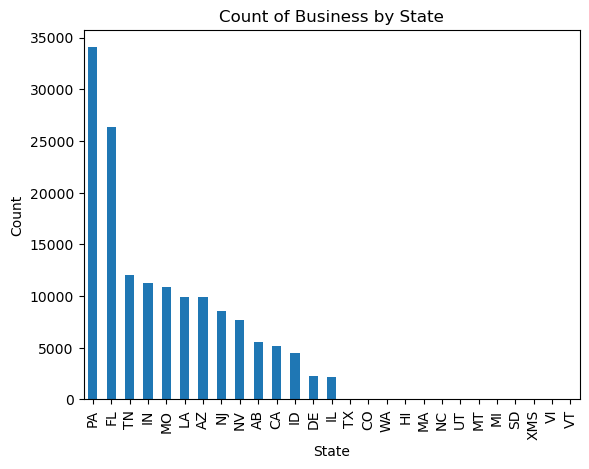

In [12]:
import matplotlib.pyplot as plt

state_counts = df["state"].value_counts()
state_counts.plot(kind='bar')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Business by State')
plt.show()

- 27개의 주 중에서 하위 13개의 주의 business 수는 미비하다.
- 상위 14개의 state로 범위를 제한하자.

## 상위 14개 State의 Business 수 집계

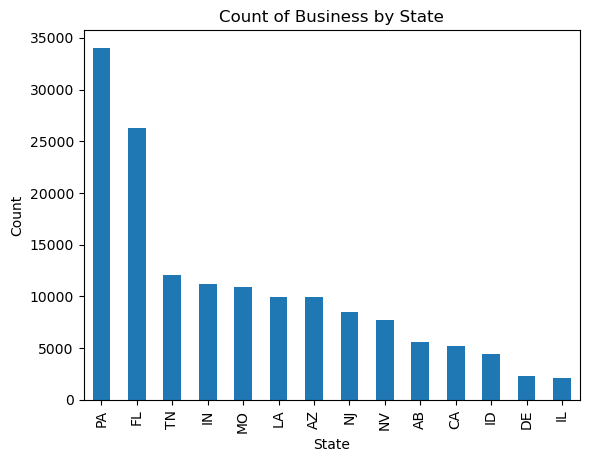

In [13]:
state_counts = df["state"].value_counts().head(14)
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Business by State')
plt.show()

- PA(Pennsylvania)의 business수가 가장 많다.
- FL(Florida)의 business수가 2위이며, 3위와 큰 차이를 보인다.

## City를 기준으로 Business 수 집계

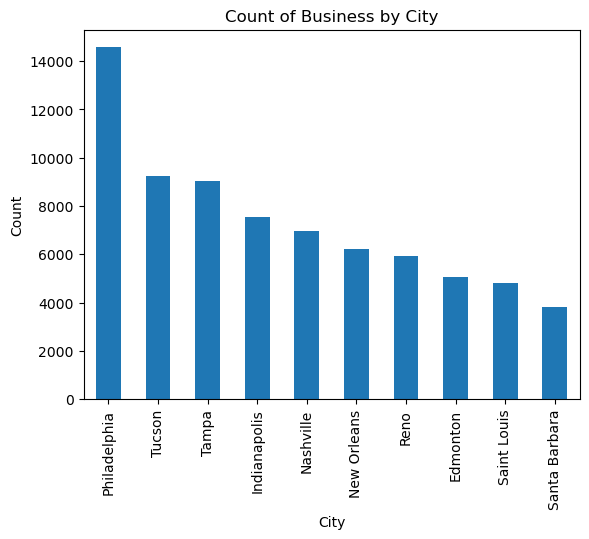

In [14]:
city_counts = df["city"].value_counts().head(10)
city_counts.plot(kind='bar')

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of Business by City')
plt.show()

### Data를 Philadelphia로 한정하더라도 데이터가 충분할 것으로 보임

- Philadelphia의 Business수가 가장 많다.
- Philadelphia의 Business 수는 2위와 차이가 크다.
- Philadelphia는 PA 주에 위치한 도시이다.

# Business의 업종 분석

## 전체 Category에 대해 집계

In [15]:
category_counts = {}

for categories in df[df.city=="Philadelphia"]["categories"]:
    if type(categories) == float:
        category_counts["unknown"] = category_counts.get("unknown", 0) + 1
    else:
        for category in categories.split(", "):
            category_counts[category] = category_counts.get(category, 0) + 1
category_df = pd.DataFrame(list(category_counts.items()), columns=['category', 'count'])
category_df = category_df.sort_values(by="count", ascending=False)
category_df.head(10)

,category,count
0,Restaurants,5852
1,Food,3105
30,Shopping,2091
11,Nightlife,1463
32,Beauty & Spas,1320
9,Bars,1293
27,Home Services,1151
28,Local Services,1013
79,Health & Medical,984
24,Sandwiches,929


- Philadelphia에서 가장 많은 category은 Restaurants다.
- 또한 2위가 Food로 음식 관련 category의 비중이 큼을 확인 할 수 있다.
- Yelp Dataset은 상위/하위 category를 지원하므로, 상위 category로 집계를 단순화 할 수 있다.

## 상위 Category에 대해 집계

In [16]:
upper_category = ["Active Life", "Arts & Entertainment", "Automotive", "Beauty & Spas", "Education", "Event Planning & Services"
    ,"Financial Services", "Food", "Health & Medical", "Home Services", "Hotels & Travel", "Local Flavor", "Local Services"
    , "Mass Media", "Nightlife", "Pets", "Professional Services", "Public Services & Government", "Religious Organizations"
    , "Restaurants", "Shopping"]

ucategpry_df = category_df[category_df["category"].isin(upper_category)]
ucategpry_df

,category,count
0,Restaurants,5852
1,Food,3105
30,Shopping,2091
11,Nightlife,1463
32,Beauty & Spas,1320
27,Home Services,1151
28,Local Services,1013
79,Health & Medical,984
66,Event Planning & Services,819
21,Automotive,665


### 시각화

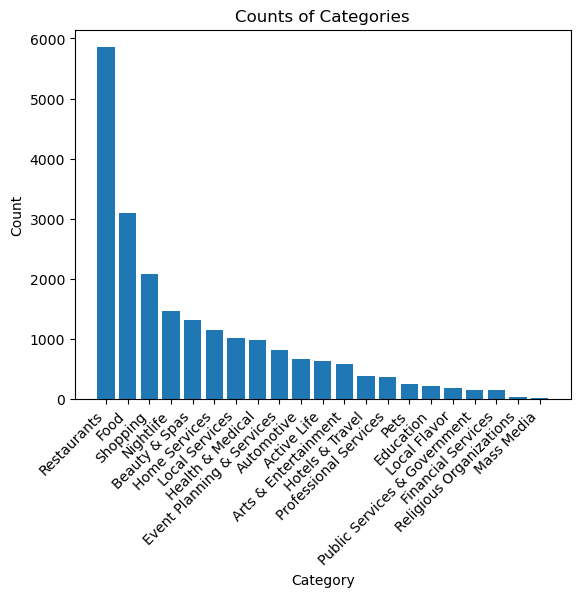

In [17]:
plt.bar(ucategpry_df["category"], ucategpry_df["count"])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

### Category를 Restaurants와 Food로 한정할 수 있을 것으로 보임

- Category 중 Restaurants가 가장 많음을 확인할 수 있다.
- 또한, 2위가 Food로 Philadephia는 음식 관련 업종이 가장 많음을 확인할 수 있다.

# 최종 데이터 추출

## Business_info { id, location, category } 생성

In [18]:
import pandas as pd

df_b = pd.read_csv("yelp_dataset\csv\yelp_academic_dataset_business.csv")
df_b = df_b[df_b.city=="Philadelphia"]
df_b = df_b.dropna(subset="categories")
df_b = df_b[df_b["categories"].str.contains("Restaurants|Food")]
df_b = df_b[["business_id", "latitude", "longitude", "categories"]]
df_b

,business_id,latitude,longitude,categories
3,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
15,MUTTqe8uqyMdBl186RmNeA,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese"
19,ROeacJQwBeh05Rqg7F6TCg,39.943223,-75.162568,"Korean, Restaurants"
28,QdN72BWoyFypdGJhhI5r7g,39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta..."
31,Mjboz24M9NlBeiOJKLEd_Q,40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup"
...,...,...,...,...
150287,VZbkSeZtFynEascotq7ExA,39.953391,-75.196765,"Restaurants, Food Stands"
150298,gPr1io7ks0Eo3FDsnDTYfg,40.060414,-75.191084,"Sandwiches, Restaurants, Italian"
150306,wVxXRFf10zTTAs11nr4xeA,40.032483,-75.214430,"Restaurants, Specialty Food, Food, Sandwiches,..."
150319,8n93L-ilMAsvwUatarykSg,39.951018,-75.198240,"Coffee & Tea, Food, Sandwiches, American (Trad..."


### 저장 및 확인

In [19]:
# df_b.to_csv("philadelphia_business.csv", encoding="utf-8", index=False)

In [21]:
pd.read_csv("philadelphia_business.csv")

,business_id,latitude,longitude,categories
0,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,MUTTqe8uqyMdBl186RmNeA,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese"
2,ROeacJQwBeh05Rqg7F6TCg,39.943223,-75.162568,"Korean, Restaurants"
3,QdN72BWoyFypdGJhhI5r7g,39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta..."
4,Mjboz24M9NlBeiOJKLEd_Q,40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup"
...,...,...,...,...
7071,VZbkSeZtFynEascotq7ExA,39.953391,-75.196765,"Restaurants, Food Stands"
7072,gPr1io7ks0Eo3FDsnDTYfg,40.060414,-75.191084,"Sandwiches, Restaurants, Italian"
7073,wVxXRFf10zTTAs11nr4xeA,40.032483,-75.214430,"Restaurants, Specialty Food, Food, Sandwiches,..."
7074,8n93L-ilMAsvwUatarykSg,39.951018,-75.198240,"Coffee & Tea, Food, Sandwiches, American (Trad..."
